In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [6]:
data['Urban'] = data['Urban'].map({'No': 0, 'Yes': 1})
data['US'] = data['US'].map({'No': 0, 'Yes': 1})

# Convert 'ShelveLoc' column to 0, 1, and 2
data['ShelveLoc'] = data['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good': 2})

# Print the updated DataFrame
print(data.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          2   65   
2  10.06        113      35           10         269     80          1   59   
3   7.40        117     100            4         466     97          1   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0  


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [8]:
X = data.drop(columns=['Sales'])
y = data['Sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

In [11]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [12]:
y_pred = tree_regressor.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 6.68


In [14]:
base_estimator = DecisionTreeRegressor(max_depth=3, random_state=42)

In [15]:
bagging_regressor = BaggingRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

In [16]:
bagging_regressor.fit(X_train, y_train)

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                      random_state=42),
                 n_estimators=100, random_state=42)

In [17]:
y_pred = bagging_regressor.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 4.35


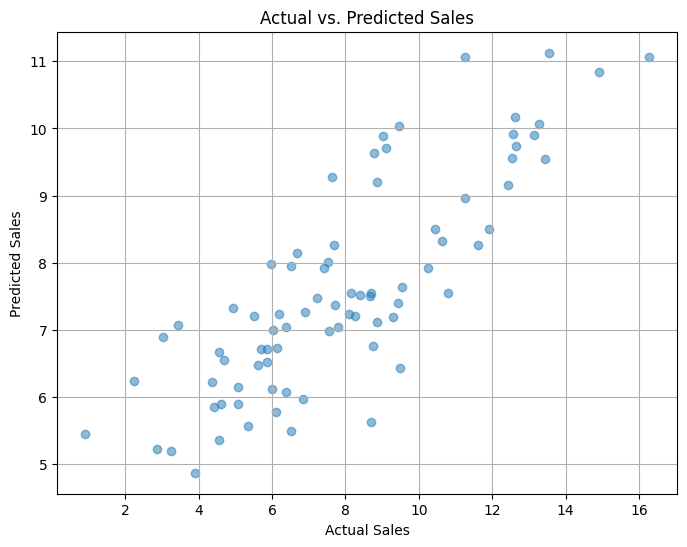

In [19]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted sales values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.grid(True)
plt.show()

In [20]:
model = DecisionTreeRegressor(criterion = 'absolute_error',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

In [21]:
from sklearn import tree

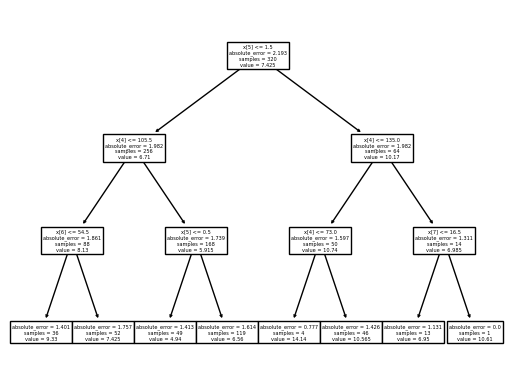

In [22]:
tree.plot_tree(model)

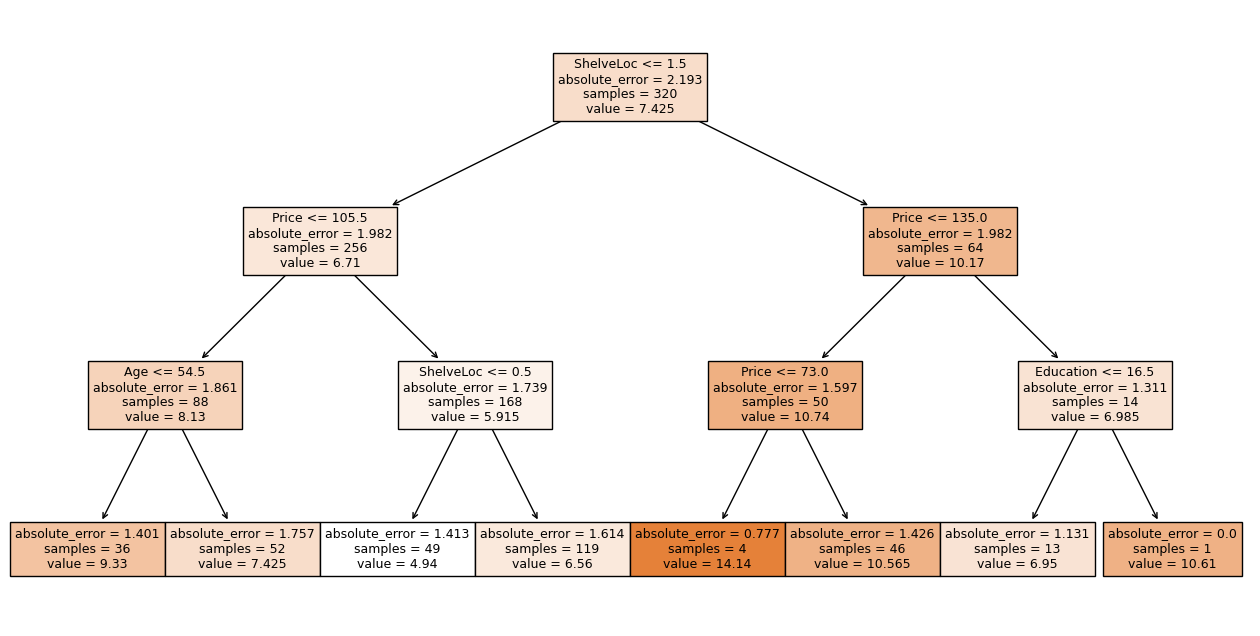

In [27]:
plt.figure(figsize=(16, 8))
tree.plot_tree(model, feature_names=list(X_train.columns), filled=True)
plt.show()